# 
<div align="center", style="font-size:290%">
                <font color="#EA1515">
                    <b>  VEHICLE INSURANCE PREDICTION CHALLENGE

---
---

## PROBLEM STATEMENT :
---
- The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 
- You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement.
- You are given a rich dataset consisting of  thousands of rows of past records, which you can use to learn more about your customers’ behaviours.

## EVALUATION CRITERIA :
---

- F1- Score

## COLUMNS :
---

- ID
- AGE
- GENDER
- DRIVING_EXPERIENCE
- EDUCATION
- INCOME
- CREDIT_SCORE
- VEHICLE_OWNERSHIP
- VEHICLE_YEAR
- MARRIED
- CHILDREN
- POSTAL_CODE
- ANNUAL_MILEAGE
- SPEEDING_VIOLATIONS
- DUIS
- PAST_ACCIDENTS
- OUTCOME (TARGET)
- TYPE_OF_VEHICLE

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b>  IMPORTING BASIC LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b>  IMPORTING THE FILES AND RUNNING THE HEAD

In [2]:
train = pd.read_csv(r"D:\PGP DSE\Data Analysis Practice Sets\Hackathon 1\train.csv")
test  = pd.read_csv(r"D:\PGP DSE\Data Analysis Practice Sets\Hackathon 1\test.csv")
sub   = pd.read_csv(r"D:\PGP DSE\Data Analysis Practice Sets\Hackathon 1\submission.csv")
df    = pd.concat((train,test),ignore_index=True)
df.head()

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  816393  40-64  female             20-29y   university   middle class   
1  251762  26-39    male             20-29y  high school   middle class   
2  481952  40-64    male             20-29y         none   middle class   
3    3506  40-64    male             20-29y  high school    upper class   
4  498013  40-64  female             20-29y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.638050                  0   after 2015        0         0   
1      0.475741                  1  before 2015        1         0   
2      0.839817                  1  before 2015        1         1   
3      0.682527                  1  before 2015        0         1   
4      0.572184                  1   after 2015        1         1   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        37379           11000                    0     0               0   
1        10238            9000                    0     0               0   
2        10238           12000                    0     0               0   
3        92099            6000                    1     0               0   
4        32122           15000                    0     0               1   

   OUTCOME TYPE_OF_VEHICLE  
0      0.0      Sports Car  
1      1.0       HatchBack  
2      1.0           Sedan  
3      1.0           Sedan  
4      0.0           Sedan

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> RUNNING THE INFO AND CHECKING SHAPE

In [3]:
print(df.info(),'\n',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  int64  
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  int64  
 10  CHILDREN             105000 non-null  int64  
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  int64  
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> RUNNING FIVE POINT SUMMARY

In [4]:
df.describe(include='all').T

count unique          top   freq           mean  \
ID                   105000.0    NaN          NaN    NaN  394931.295905   
AGE                    105000      4        40-64  33716            NaN   
GENDER                 105000      2         male  65317            NaN   
DRIVING_EXPERIENCE     105000      4       20-29y  37493            NaN   
EDUCATION              105000      3  high school  46590            NaN   
INCOME                 105000      4  upper class  51271            NaN   
CREDIT_SCORE         105000.0    NaN          NaN    NaN       0.602173   
VEHICLE_OWNERSHIP    105000.0    NaN          NaN    NaN       0.827038   
VEHICLE_YEAR           105000      2  before 2015  57511            NaN   
MARRIED              105000.0    NaN          NaN    NaN       0.584143   
CHILDREN             105000.0    NaN          NaN    NaN           0.52   
POSTAL_CODE          105000.0    NaN          NaN    NaN   18045.439267   
ANNUAL_MILEAGE       105000.0    NaN          NaN    NaN   11061.228571   
SPEEDING_VIOLATIONS  105000.0    NaN          NaN    NaN       0.675676   
DUIS                 105000.0    NaN          NaN    NaN       0.129733   
PAST_ACCIDENTS       105000.0    NaN          NaN    NaN       0.549314   
OUTCOME               87285.0    NaN          NaN    NaN       0.422959   
TYPE_OF_VEHICLE        105000      4   Sports Car  34592            NaN   

                               std      min        25%       50%        75%  \
ID                   279694.106053    101.0  156351.75  354679.5  598602.25   
AGE                            NaN      NaN        NaN       NaN        NaN   
GENDER                         NaN      NaN        NaN       NaN        NaN   
DRIVING_EXPERIENCE             NaN      NaN        NaN       NaN        NaN   
EDUCATION                      NaN      NaN        NaN       NaN        NaN   
INCOME                         NaN      NaN        NaN       NaN        NaN   
CREDIT_SCORE              0.138045  0.06688   0.514876  0.601112   0.703216   
VEHICLE_OWNERSHIP         0.378216      0.0        1.0       1.0        1.0   
VEHICLE_YEAR                   NaN      NaN        NaN       NaN        NaN   
MARRIED                   0.492871      0.0        0.0       1.0        1.0   
CHILDREN                  0.499602      0.0        0.0       1.0        1.0   
POSTAL_CODE           16709.040449  10238.0    10238.0   10238.0   22957.75   
ANNUAL_MILEAGE         2972.355482   2000.0     9000.0   11000.0    13000.0   
SPEEDING_VIOLATIONS       1.383678      0.0        0.0       0.0        1.0   
DUIS                      0.589714      0.0        0.0       0.0        0.0   
PAST_ACCIDENTS            1.402809      0.0        0.0       0.0        0.0   
OUTCOME                   0.494032      0.0        0.0       0.0        1.0   
TYPE_OF_VEHICLE                NaN      NaN        NaN       NaN        NaN   

                          max  
ID                   999976.0  
AGE                       NaN  
GENDER                    NaN  
DRIVING_EXPERIENCE        NaN  
EDUCATION                 NaN  
INCOME                    NaN  
CREDIT_SCORE         0.954075  
VEHICLE_OWNERSHIP         1.0  
VEHICLE_YEAR              NaN  
MARRIED                   1.0  
CHILDREN                  1.0  
POSTAL_CODE           92101.0  
ANNUAL_MILEAGE        21000.0  
SPEEDING_VIOLATIONS      20.0  
DUIS                      6.0  
PAST_ACCIDENTS           15.0  
OUTCOME                   1.0  
TYPE_OF_VEHICLE           NaN

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> TARGET VARIABLE

PERCENTAGE OF VALUES :
---------------------
0.0    0.577041
1.0    0.422959
Name: OUTCOME, dtype: float64


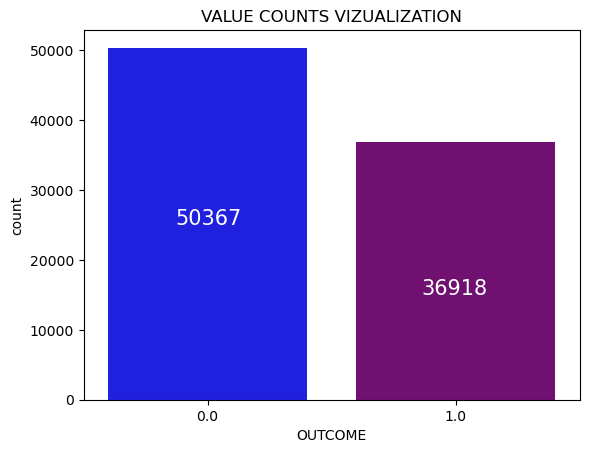

In [5]:
print('PERCENTAGE OF VALUES :\n---------------------')
print(df.OUTCOME.value_counts(normalize=True))
sns.countplot(df.OUTCOME,palette=['blue','purple'])

plt.text(-0.13,25000,'%d'%(df.OUTCOME[df.OUTCOME==0.0].size),size=15,color='white')
plt.text(0.86,15000,'%d'%(df.OUTCOME[df.OUTCOME==1.0].size),size=15,color='white')
plt.title('VALUE COUNTS VIZUALIZATION')
plt.show()

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> CHECKING PERCENTAGE OF CATEGORIES IN CATEGORICAL COLUMN

In [5]:
num_cols = df.select_dtypes(np.number).columns.to_list()
cat_cols = df.select_dtypes(object).columns.to_list()

In [6]:
for i in cat_cols:
    print(i,' ----------> ',df[i].nunique())

AGE  ---------->  4
GENDER  ---------->  2
DRIVING_EXPERIENCE  ---------->  4
EDUCATION  ---------->  3
INCOME  ---------->  4
VEHICLE_YEAR  ---------->  2
TYPE_OF_VEHICLE  ---------->  4


##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> UNIVARIATE ANALYSIS

---

In [8]:
plt.figure(figsize=(30,14),dpi=600)
j = 1
for i in num_cols+cat_cols:
    plt.subplot(4,5,j)
    if i in num_cols:
        sns.distplot(df[i],color='blue')
    else:
        sns.countplot(df[i],palette=['blue','purple','violet','indigo'])
    j+=1
plt.tight_layout()
plt.show()

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> BIVARIATE ANALYSIS

---

In [9]:
plt.figure(figsize=(30,14),dpi=600)
j = 1
for i in num_cols+cat_cols:
    plt.subplot(4,5,j)
    if i in num_cols:
        sns.boxplot(df.OUTCOME,df[i],palette=['blue','purple'],)
    else:
        sns.countplot(df[i],hue=df.OUTCOME,palette=['blue','purple'])
    j+=1
plt.tight_layout()
plt.show()

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> AS PER THE VISUAL ANALYSIS

### Univariate analysis summary

• 40 to 64 age range customers are more • Followed by 65+ • 16 to 25 age range customers are less • Insurance cost is more when we gets old • Young people are prone to accidents and violations GENDER: • Male customers are more (62%) • Insurance for female is less compared with male DRIVING EXPERIENCE:

• Only 8% of the customers have 30+ year of experience EDUCATION

• 44% of the customers have completed high school education INCOME

• Close to 50% of the customers belongs to upper class income • If our income is more, we pay the premium on time and renew VEHICLE OWNERSHIP

• 17% of the customers are not owners of the vehicle • They have less experience VEHICLE YEAR | MARRIED | CHILDREN

• Almost equal distribution MILEAGE

• The more you drive, the more you are likely to get accident. Insurance premium cost would be more. • Re-create variable with certain buckets / bin SPEEDING VIOLATIONS

• 65% of the customers don’t have any violations • 30% of the customers fall in the range of 1 to 5 violation scale • Violations would increase insurance premium cost • Re-create variable with certain buckets / bin DUIS

• 7% of the customers have DUI violation • Driving while intoxicated / operating a motor vehicle impaired (DUI) • Re-create variable with certain buckets / bin PAST ACCIDENTS

• 75% of the customers don’t have any past accidents • 13% of the customers have one accident record • Re-create variable with certain buckets / bin • Frequent accident will increase the premium amount , flag as risky profile

VEHICLE TYPE  32 % of the customers have sports car insurance (premium is high than others)

Change data type • VEHICLE OWNERSHIP • MARRIED • CHILDREN • ANNUAL_MILEAGE • SPEEDING_VIOLATIONS • DUIS • PAST_ACCIDENTS

In [7]:
cat = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_YEAR', 'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP',\
       'MARRIED', 'CHILDREN']
num = ['POSTAL_CODE', 'SPEEDING_VIOLATIONS', 'CREDIT_SCORE', 'ID', 'PAST_ACCIDENTS', 'ANNUAL_MILEAGE', 'DUIS']

print("Categorical Variables :\n----------------------\n\n",cat,'\n\n')
print("Numerical   Variables :\n----------------------\n\n",num,'\n')

Categorical Variables :
----------------------

 ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'] 


Numerical   Variables :
----------------------

 ['POSTAL_CODE', 'SPEEDING_VIOLATIONS', 'CREDIT_SCORE', 'ID', 'PAST_ACCIDENTS', 'ANNUAL_MILEAGE', 'DUIS'] 



##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> MISSING VALUES

---

In [8]:
print(df.isnull().sum())

# THERE ARE NO MISSING VALUES

ID                         0
AGE                        0
GENDER                     0
DRIVING_EXPERIENCE         0
EDUCATION                  0
INCOME                     0
CREDIT_SCORE               0
VEHICLE_OWNERSHIP          0
VEHICLE_YEAR               0
MARRIED                    0
CHILDREN                   0
POSTAL_CODE                0
ANNUAL_MILEAGE             0
SPEEDING_VIOLATIONS        0
DUIS                       0
PAST_ACCIDENTS             0
OUTCOME                17715
TYPE_OF_VEHICLE            0
dtype: int64


##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> FEATURE ENGINEERING AND FEATURE MANIPULATION

---

In [10]:
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype('O')
df['CHILDREN'] = df['CHILDREN'].astype('O')
df['MARRIED'] = df['MARRIED'].astype('O')

In [11]:
df['new_AGE'] = np.where(df.AGE=='65+','65-65',df.AGE)
df.new_AGE = (df.new_AGE.str.split('-',expand=True)[0].astype(np.number) + df.new_AGE.str.split('-',expand=True)[1].astype(np.number))/2
del df['AGE']

In [12]:
df["new_DRIVING_EXPERIENCE"] = df.DRIVING_EXPERIENCE.str.split('y',expand=True)[0]
df.new_DRIVING_EXPERIENCE = np.where(df.new_DRIVING_EXPERIENCE=='30','30-30',df.new_DRIVING_EXPERIENCE)
df.new_DRIVING_EXPERIENCE = (df.new_DRIVING_EXPERIENCE.str.split('-',expand=True)[0].astype(np.number) + \
                         df.new_DRIVING_EXPERIENCE.str.split('-',expand=True)[1].astype(np.number))/2
del df['DRIVING_EXPERIENCE']

In [13]:
df["new_SPEEDING_VIOLATIONS"] = np.where(df.SPEEDING_VIOLATIONS==0,0,1)
df.new_SPEEDING_VIOLATIONS = df.SPEEDING_VIOLATIONS.astype('O')
del df['SPEEDING_VIOLATIONS']

In [14]:
df["new_DUIS"] = np.where(df.DUIS==0,0,1)
df.new_DUIS = df.new_DUIS.astype('O')
del df['DUIS']

In [15]:
df["new_PAST_ACCIDENTS"] = np.where(df.PAST_ACCIDENTS==0,0,1)
df.new_PAST_ACCIDENTS = df.new_PAST_ACCIDENTS.astype('O')
del df['PAST_ACCIDENTS']

In [16]:
df.drop(columns = ['POSTAL_CODE','ID'],inplace=True)

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> STATISTICAL ANALYSIS

---

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> APPLYING TESTS

In [17]:
li = []
for i in df:
    if i !='OUTCOME':
        if df[i].dtype != object:
            a = df[df.OUTCOME==0.0][i]
            b = df[df.OUTCOME==1.0][i]
            if round(stats.mannwhitneyu(a,b)[1],3)<0.05:
                li.append(i)
        else:
            if round(stats.chi2_contingency(pd.crosstab(df[i],df.OUTCOME))[1],3)<0.05:
                li.append(i)
print('Significant Columns :',li)

Significant Columns : ['GENDER', 'TYPE_OF_VEHICLE', 'new_DRIVING_EXPERIENCE']


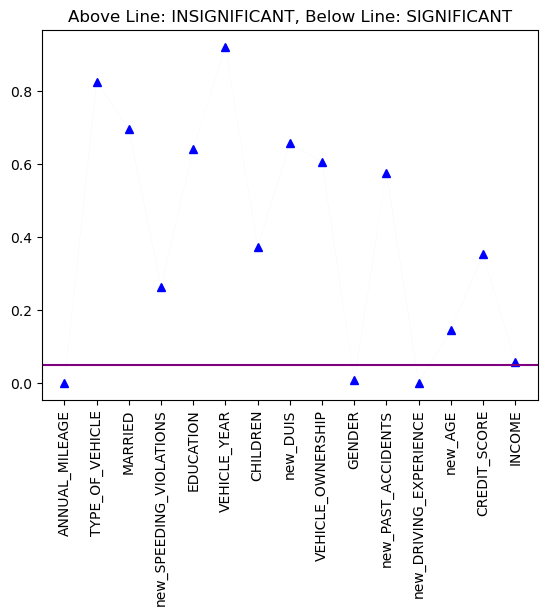

In [18]:
p = []
for i in df:
    if i != 'OUTCOME':
        if df[i].dtype != object:
                a = df[df.OUTCOME==0.0][i]
                b = df[df.OUTCOME==1.0][i]
                p.append(round(stats.mannwhitneyu(a,b)[1],3))
        else:
            p.append(round(stats.chi2_contingency(pd.crosstab(df[i],df.OUTCOME))[1],3))
plt.plot(list(set(df.columns) - {'OUTCOME'}),p,color='blue',marker='^',lw=0.01)
plt.xticks(rotation=90)
plt.title('Above Line: INSIGNIFICANT, Below Line: SIGNIFICANT')
plt.axhline(y=0.05,color='purple')
plt.show()

##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> DATA PREPROCESSING

---

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> SPLITTING THE DATA INTO TRAIN AND TEST

In [19]:
train = df[df.OUTCOME.notnull()]
test  = df[df.OUTCOME.isnull()].drop('OUTCOME',axis=1)
X = train.drop('OUTCOME',axis=1)
y = train.OUTCOME

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> SCALING THE NUMERICAL DATA

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                           # INITIATING MACHINE INSTANCE
for i in X.select_dtypes(np.number):
    X[i] = sc.fit_transform(pd.DataFrame(X[i]))
    test[i] = sc.transform(pd.DataFrame(test[i]))

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> ENCODING THE CATEGORICAL DATA (FREQUENCY ENCODING)

In [21]:
for i in X.select_dtypes('O').columns:
    for j in X[i].unique():
        X.loc[df[i]==j,i] = X.loc[df[i]==j,i].shape[0]/X.shape[0]
for i in test.select_dtypes('O').columns:
    for j in test[i].unique():
        test.loc[df[i]==j,i] = test.loc[df[i]==j,i].shape[0]/test.shape[0]
for i in X.select_dtypes('O'):
    X[i] = X[i].astype(np.number)
    test[i] = test[i].astype(np.number)

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> CHECKING FOR IMBALANCE IN THE DATA AND FIXING IT

In [22]:
print('OLD RATIO :\n')

print(y.value_counts(normalize=True))

from imblearn.over_sampling import ADASYN,SMOTE
X,y = SMOTE().fit_resample(X,y)

print('New Ratio :\n')

print(y.value_counts(normalize=True))

OLD RATIO :

0.0    0.577041
1.0    0.422959
Name: OUTCOME, dtype: float64
New Ratio :

0.0    0.5
1.0    0.5
Name: OUTCOME, dtype: float64


##### 
<div align="center", style="font-size:250%">
                <font color="8F15DA">
                    <b> MODELLING

---

##### 
<div align="left", style="font-size:150%">
                <font color="#151EDA">
                    <b> IMPORTING THE LIBRARIES AND FUNCTIONS

In [25]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,\
roc_curve,log_loss
from sklearn.model_selection import cross_val_score,StratifiedKFold

##### 
<div align="left", style="font-size:140%">
                <font color="#151EDA">
                    <b> CROSS VALIDATING THE MODELS USING STRATIFIED KFOLD CROSS VALIDATION AND EVALUATING

In [24]:
# CREATING MACHINE INSTANCE

lr  = LogisticRegression()
rg  = RidgeClassifier()
dt  = DecisionTreeClassifier()
rf  = RandomForestClassifier()
xg  = XGBClassifier()
ca  = CatBoostClassifier(verbose=0)
ad  = AdaBoostClassifier()
gb  = GradientBoostingClassifier()
lg  = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
gn  = GaussianNB()
st  = StackingClassifier([('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())],final_estimator=lr,stack_method='predict')

In [30]:
cv = StratifiedKFold(n_splits=5,shuffle=True)

for m in [lr,rg,dt,rf,xg,ca,knn,st]:
    print('\t\t',m,'\n')
    for i,j in cv.split(X,y):
        xtr,xte,ytr,yte = X.loc[i],X.loc[j],y[i],y[j]
        model = m.fit(xtr,ytr)
        pred_tr,pred_te = model.predict(xtr),model.predict(xte)
        print(round(f1_score(ytr,pred_tr),4),' , ',round(f1_score(yte,pred_te),4))
    print('\n')

		 LogisticRegression() 

0.5084  ,  0.4988
0.511  ,  0.5041
0.5083  ,  0.5052
0.5047  ,  0.5041
0.5122  ,  0.5059


		 RidgeClassifier() 

0.5082  ,  0.5041
0.5094  ,  0.5061
0.5101  ,  0.5114
0.5098  ,  0.5021
0.5086  ,  0.5058


		 DecisionTreeClassifier() 

1.0  ,  0.5733
1.0  ,  0.5744
1.0  ,  0.5774
1.0  ,  0.58
1.0  ,  0.5785


		 RandomForestClassifier() 

1.0  ,  0.5327
1.0  ,  0.5321
1.0  ,  0.5421
1.0  ,  0.54
1.0  ,  0.5416


		 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
   

In [ ]:
# USING STACKING CLASSIFIER AS FINAL MODEL WITH BAGGING CLASSIFIER AS FINAL ESTIMATOR

In [26]:
st = StackingClassifier([('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier())],final_estimator=BaggingClassifier())

In [31]:
model = st.fit(X,y)

In [32]:
sub['OUTCOME'] = model.predict(test)
sub.to_csv('h1.csv',index=False)